### Load project package

In [2]:
setwd('~/Documents/Project/germVar')
library(germVar2)
#data(all_patients)
#data(list_goi)
#data(LoF_vars)
#data(nsSNP_var)

,Gene,AAChange.p,EFF,AC2,TAC2,AN2,TEAC2,EAN,ESP_AC,ESP_AN,ESP_EA_AC,ESP_EA_AN,X2kG_AC,ExAC_AdjAC,rare,tier1,tier2,NMD_HC,LoF_filter,ExonRank,TotalExon,CDS_frac,MDG,CPG,Class,NALT_AD_med,TALT_AD_med,NAB_med,TAB_med,Transcript,AAChange,uid,CHROM
1,TNFRSF18,Arg228*,stop_gained,1,1,16810,0,13518,17,12788,1,8488,0,34,TRUE,TRUE,FALSE,FALSE,||,5,5,0.943,FALSE,FALSE,Putative TSG,7,18,0.5833333,0.75,ENST00000379268,p.Arg228*/c.682C>T,1-1139268-G-A,1
2,TNFRSF18,Val100fs,frameshift_variant,2,1,17208,0,13872,50,12484,32,8234,0,0,TRUE,TRUE,FALSE,TRUE,|||,2,5,0.412,FALSE,FALSE,Putative TSG,21.5,7,0.505805,0.2916667,ENST00000379268,p.Val100fs/c.298delG,1-1140761-AC-A,1
3,TNFRSF18,Trp70*,stop_gained,3,2,17278,2,13932,0,13006,0,8600,0,4,TRUE,TRUE,FALSE,TRUE,||,2,5,0.289,FALSE,FALSE,Putative TSG,11,27.5,0.4583333,0.4995671,ENST00000379268,p.Trp70*/c.209G>A,1-1140851-C-T,1
4,TNFRSF4,Pro172_Ala173fs,frameshift_variant,4,1,17474,1,14072,0,13006,0,8600,0,2,TRUE,TRUE,FALSE,TRUE,,5,7,0.62,FALSE,FALSE,Other,2,7,0.1833333,0.2413793,ENST00000379236,p.Pro172_Ala173fs/c.515_516insC,1-1147440-T-TG,1
5,TNFRSF4,Asp170fs,frameshift_variant,1,1,17498,1,14088,0,13006,0,8600,0,5,TRUE,TRUE,FALSE,TRUE,,5,7,0.613,FALSE,FALSE,Other,18,5,0.5142857,0.3125,ENST00000379236,p.Asp170fs/c.509delA,1-1147446-GT-G,1
6,TNFRSF4,Cys2*,stop_gained,2,1,16844,1,13556,0,13006,0,8600,0,0,TRUE,TRUE,FALSE,TRUE,,1,7,0.007,FALSE,FALSE,Other,5,2,0.3690476,0.2857143,ENST00000379236,p.Cys2*/c.6C>A,1-1149502-G-T,1
7,CDK11B,Pro523fs,frameshift_variant,1,1,17508,1,14098,0,13006,0,8600,0,0,TRUE,TRUE,FALSE,TRUE,||||,15,21,0.666,FALSE,FALSE,Putative TSG,178,281,0.4671916,0.7827298,ENST00000407249,p.Pro523fs/c.1569delC,1-1572779-AG-A,1
8,CDK11B,Lys105_Leu106fs,frameshift_variant,1,1,11828,0,9568,0,13006,0,8600,0,2,TRUE,TRUE,FALSE,TRUE,|||,4,21,0.133,FALSE,FALSE,Putative TSG,10,7,0.3703704,0.5,ENST00000407249,p.Lys105_Leu106fs/c.314_315insA,1-1581209-C-CT,1
9,C1orf86,Trp95fs,frameshift_variant,1,1,17394,0,14038,0,13006,0,8600,0,0,TRUE,TRUE,FALSE,TRUE,|||||||,3,4,0.526,FALSE,FALSE,Putative TSG,27,44,0.3648649,0.275,ENST00000378546,p.Trp95fs/c.284_288delGGGGC,1-2125259-GGCCCC-G,1
10,TNFRSF14,NA,splice_acceptor_variant,1,1,17534,0,14154,0,13006,0,8600,0,0,TRUE,TRUE,FALSE,TRUE,|||||,6,8,0.65,FALSE,FALSE,Other,23,23,0.1533333,0.1111111,ENST00000355716,c.552A>G,1-2493110-A-G,1


### Number of unique patient in each cancer type

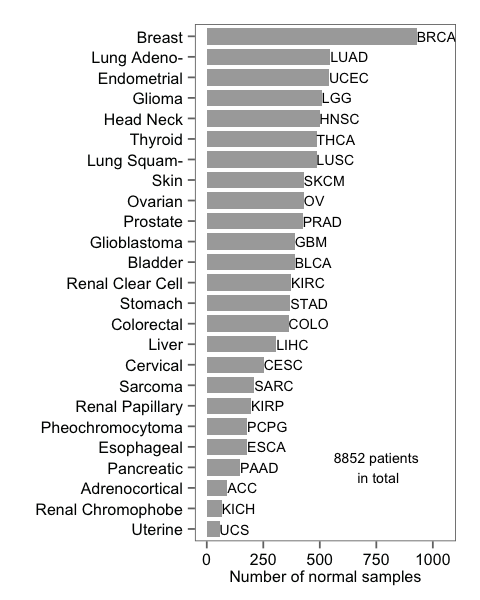

In [6]:
options(repr.plot.height = 5, repr.plot.width = 4.)
all_tally <- subset(all_patients, !duplicated(disease2))
p <- ggplot(aes(reorder(disease2, study_size), study_size, label=disease2), data=all_tally) + geom_bar(stat = "identity", fill="darkgrey", width=0.8) + coord_flip()
p <- p + theme_few() + geom_text(hjust=0, size=3) 
p <- labelDisease(p)
p <- p + theme(axis.text= element_text(size=rel(0.8)), axis.title= element_text(size=rel(0.8)))
p <- p + xlab("") + ylab("Number of normal samples") + scale_y_continuous(limits=c(0,1050))
p <- p + annotate("text", x="PAAD", y=750, label="8852 patients\n in total", size=3 )
p
ggsave(filename="Figures/sample_overview.pdf",height=5.5, width=4.5)

### Classification of the candidate gene list

In [10]:
# for the known cancer genes
with(list_goi, table(MDG, CPG))
with(list_goi, c(sum(MDG), sum(CPG), sum(MDG|CPG)))

       CPG
MDG     FALSE TRUE
  FALSE  1491   69
  TRUE     85   40

[1] 125 109 194


           OG         H-TSG         M-TSG Putative\nTSG         Other 
           58            88            48           810           681 

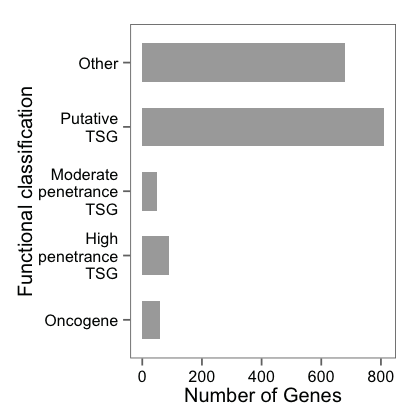

In [7]:
# overall classification
table(list_goi$Class)
options(repr.plot.height = 3.5, repr.plot.width = 3.5)
p <- ggplot(aes(Class), data= list_goi) + theme_few()
p <- p + xlab("Functional classification") + ylab("Number of Genes") + theme(legend.position=c(0.8, 0.8))
p <- p + geom_bar(fill = "darkgrey", width=0.6 ) + theme( axis.title= element_text(size=rel(1)), axis.text.y= element_text(size=rel(1)))
p <- p + coord_flip() 
p <- p + scale_x_discrete(labels = c( "OG"="Oncogene",  "H-TSG"="High\npenetrance\nTSG",  
        "M-TSG"="Moderate\npenetrance\nTSG", "Putative\nTSG"="Putative\nTSG", "Other"="Other"))                            
p
ggsave(filename="Figures/gene_classification_hist.pdf",height=4, width=4)


### Sources of the candidate gene list

cgc500 smg260 tsg716    rep 
   527    258    730    182

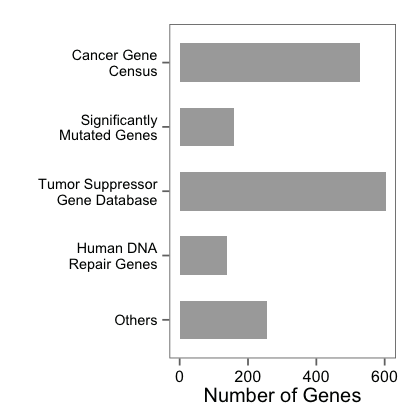

In [13]:
apply(list_goi[c("cgc500", "smg260", "tsg716", "rep")], 2, sum)
options(repr.plot.height = 3.5, repr.plot.width = 3.5)
to_plot <- list_goi
to_plot$mem <- factor(to_plot$mem, levels=c("OTHER", "REP", "TSG", "SMG", "CGC"))
p <- ggplot(aes(mem), data= to_plot) + theme_few()
p <- p + xlab("Gene Source") + ylab("Number of Genes") + theme(legend.position=c(0.8, 0.8))
p <- p + geom_bar(fill = "darkgrey", width=0.6 ) 
p <- p + theme( axis.title= element_text(size=rel(1)), axis.text.y= element_text(size=rel(0.9)))
p <- p + scale_x_discrete(labels = c( "CGC"="Cancer Gene\nCensus", "SMG"="Significantly\nMutated Genes", "TSG" ="Tumor Suppressor\nGene Database", "REP"="Human DNA\nRepair Genes", "OTHER"="Others"))
p <- p + coord_flip() + xlab("")
p
ggsave(filename="Figures/gene_source_hist.pdf",height=4, width=4)


### Overview of variants allele count distribution

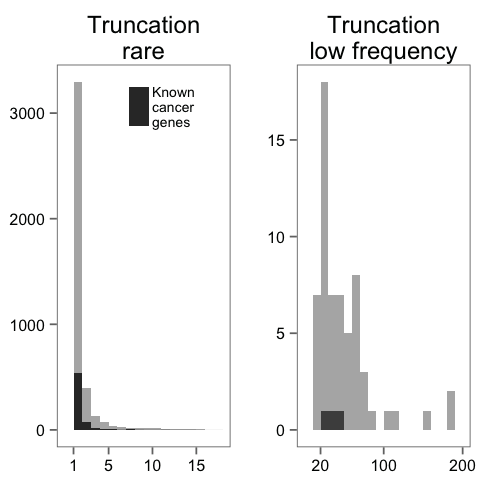

pdf 
  2

pdf 
  2

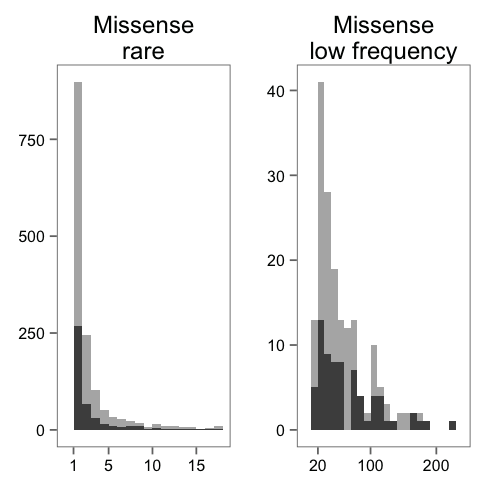

In [4]:
options(repr.plot.height = 4, repr.plot.width = 4.)

# allele count distribution
library(gridExtra)
p1a <- ggplot(aes(TAC2), data=subset(LoF_vars, rare)) + theme_few() 
p1a <- p1a + geom_bar(fill="grey70", width=0.8, binwidth=1)
p1a <- p1a + geom_bar(aes(fill=(MDG|CPG)), data =  subset(LoF_vars, rare & (MDG|CPG)), width=0.8, binwidth=1)
p1a <- p1a + scale_x_continuous(breaks=c(1, 5, 10, 15)) 
p1a <- p1a + scale_fill_manual(values=c("grey20"), guide = guide_legend(title=NULL, keywidth=0.8, keyheight=0.5), labels=c("Known\ncancer\ngenes", "Candidate\ncancer genes"))
p1a <- p1a  + labs(x=NULL, y=NULL) + theme(legend.position=c(0.6,0.9))
p1a <- p1a + theme(plot.margin = unit(c(0.2,0.1,0.2,0.2), "cm"), legend.text=element_text(size=rel(.7)))
p1a <- p1a + ggtitle("Truncation\nrare")

p1b <- ggplot(aes(TAC2), data=subset(LoF_vars, !rare)) + theme_few() 
p1b <- p1b + geom_bar(fill="grey70", width=0.6, binwidth=10)
p1b <- p1b + geom_bar(aes(fill=(MDG|CPG)), data =  subset(LoF_vars, !rare & (MDG|CPG)), width=0.6, binwidth=10)
p1b <- p1b + scale_x_continuous(breaks=c(20, 100, 200))
p1b <- p1b + scale_fill_manual(values=c("grey30", "grey80"), guide = "none")
p1b <- p1b + labs(x=NULL, y=NULL) + theme(plot.margin = unit(c(0.2,0.2,0.2,0.1), "cm"))
p1b <- p1b + ggtitle("Truncation\nlow frequency")

p2a <- ggplot(aes(TAC2), data=subset(nsSNP_vars, rare)) + theme_few() 
p2a <- p2a + geom_bar(fill="grey70", width=0.8, binwidth=1)
p2a <- p2a + geom_bar(aes(fill=(MDG|CPG)), data =  subset(nsSNP_vars, rare & (MDG|CPG)), width=0.8, binwidth=1)
p2a <- p2a + scale_x_continuous(breaks=c(1, 5, 10, 15)) 
p2a <- p2a + scale_fill_manual(values=c("grey30", "grey80"), guide = "none")
p2a <- p2a  +  labs(x=NULL, y=NULL) + theme(plot.margin = unit(c(0.2,0.1,0.2,0.2), "cm"))
p2a <- p2a + ggtitle("Missense\nrare")

p2b <- ggplot(aes(TAC2), data=subset(nsSNP_vars, !rare)) + theme_few() 
p2b <- p2b + geom_bar(fill="grey70", width=0.6, binwidth=10)
p2b <- p2b + geom_bar(aes(fill=(MDG|CPG)), data =  subset(nsSNP_vars, !rare & (MDG|CPG)), width=0.6, binwidth=10)
p2b <- p2b + scale_x_continuous(breaks=c(20, 100, 200)) #geom_bar(fill="darkgrey") #+ facet_wrap(~ lf, scales="free")
p2b <- p2b + scale_fill_manual(values=c("grey30", "grey80"), guide = "none")
p2b <- p2b + labs(x=NULL, y=NULL)+ theme(plot.margin = unit(c(0.2,0.2,0.2,0.1), "cm"))
p2b <- p2b + ggtitle("Missense\nlow frequency")

pl <- unifyPlotDim(list(p1a, p1b, p2a, p2b))
grid.arrange(pl[[1]], pl[[2]], nrow=1)
grid.arrange(pl[[3]], pl[[4]], nrow=1)

pdf(file="Figures/LoF_AC_hist.pdf", height=3.5, width=3.5)
do.call(grid.arrange, c(pl[1:2], nrow=1))#, heights=c(0.25, 0.75))
dev.off()
pdf(file="Figures/nsSNP_AC_hist.pdf", height=3.5, width=3.5)
do.call(grid.arrange, c(pl[3:4], nrow=1))#, heights=c(0.25, 0.75))
dev.off()
